<h1 align="center">Classification of Arrhythmia</h1>

The Dataset used in this project is available on the UCI machine learning Repository. 

* It can be found at: https://archive.ics.uci.edu/ml/datasets/Arrhythmia. 


* It consists of 452 different examples spread over 16 classes. Of the 452 examples,

    - 245 are of "normal" people. We also have 12 different types of arrhythmias. 
    
    - Among all these types of arrhythmias, the most representative are the "coronary artery disease" and "Rjgbt boundle branch block".


* We have 279 features, which include age, sex, weight, height of patients and other related information. We explicitly observe that the number of features is relatively high compared to the number of examples we are available.


* Our goal is to predict if a person is suffering from arrhythmia or not, and if **yes**, classify it in to one of 12 available groups.

### Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import math as mt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
#to avoid writing plot.show
%matplotlib inline
from sklearn.impute import SimpleImputer

### Data Reading

In [2]:
df=pd.read_csv("Data/arrhythmia.csv",header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [4]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


**Basic Description of dataframe**

In [5]:
#Dimension of dataset.

df.shape

(452, 280)

In [6]:
#concise summary of the dataframe.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [7]:
#descriptive statistics of dataframe.

df.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


# 1. Data preprocessing

### Handling Missing Values

<br>
When we went through the dataset we observed that out of 279 attributes, 5 Attributes have missing value in the form 
of '?'. Our approach is 

- first replacing '?' with numpy.NAN.
- Imputing the mean using Simple Imputer.

**Checking for null values in dataset**

In [8]:
#Counting total Number of null values

pd.isnull(df).sum().sum()

0

In [9]:
#Replacing ? with np.nan value-

df = df.replace('?', np.NaN)

In [10]:
#final counting total number of null values in dataset

nv=pd.isnull(df).sum().sum()
nv

408

**Visualizing  the distribution of our missing data:**

Text(0, 0.5, 'Total number of null value in each column')

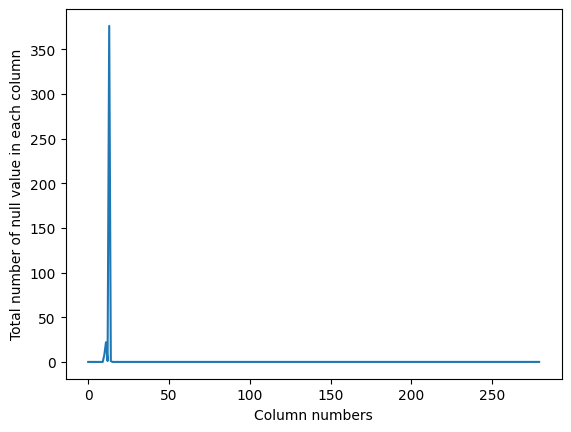

In [11]:
pd.isnull(df).sum().plot()
plt.xlabel('Column numbers')
plt.ylabel('Total number of null value in each column')

Text(0, 0.5, 'Total number of null value in each column')

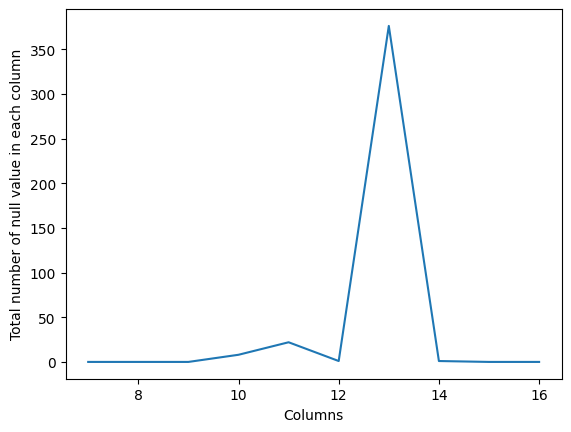

In [12]:
#Zooming in

pd.isnull(df).sum()[7:17].plot(kind="line")
plt.xlabel('Columns')
plt.ylabel('Total number of null value in each column')

Column 13 contains more than 350 missing values out of total 452 instances. so we will drop column 13. other attributes have comparatively less null values. So instead of droping, we will replace the null value of other attributes with their mean values.

In [13]:
#Dropping the column 13
df.drop(columns = 13, inplace=True)

**Using the mean strategy for imputation**

In [14]:
# make copy to avoid changing original data (when Imputing)

new_df = df.copy()

In [15]:
# make new columns indicating what will be imputed

cols_with_missing = (col for col in new_df.columns if new_df[col].isnull().any())
for col in cols_with_missing:
    new_df[col] = new_df[col].isnull()

In [16]:
# Imputation
# my_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

my_imputer = SimpleImputer()
new_df = pd.DataFrame(my_imputer.fit_transform(new_df))
new_df.columns = df.columns

In [17]:
# imputed dataframe

new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [18]:
# DataSet with Zero null Values.

pd.isnull(new_df).sum().sum()

0

**Generating final dataset**

In [19]:
#Creating column names

final_df_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]

In [20]:
#Adding Column names to dataset

new_df.columns=final_df_columns
new_df.to_csv("new data with target class.csv")
new_df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


As our dataframe is completely cleaned and preprocessed. we will remove the target attribute and store our final dataframe.

In [21]:
target=new_df["class"]

final_df = new_df.drop(columns ="class")

In [22]:
final_df.shape

(452, 278)

# 2. Exploratory Data Analysis (EDA)

Analyzing data sets to summarize their main characteristics.

Making List of all the type of Arrythmia corresponsing to their class label

In [23]:
#List with class names

class_names = ["Normal", 
               "Ischemic changes (CAD)", 
               "Old Anterior Myocardial Infraction",
               "Old Inferior Myocardial Infraction",
               "Sinus tachycardy", 
               "Sinus bradycardy", 
               "Ventricular Premature Contraction (PVC)",
               "Supraventricular Premature Contraction",
               "Left Boundle branch block",
               "Right boundle branch block",
               "1.Degree AtrioVentricular block",
               "2.Degree AV block",
               "3.Degree AV block",
               "Left Ventricule hypertrophy",
               "Atrial Fibrillation or Flutter",
               "Others"]

### Analyzing the dataset and check how many examples we have for each class:
we need to sort our dataset with respect to class attributes to count the number of instances available for each class

In [24]:
t=new_df.sort_values(by=["class"])

In [25]:
# Counting the number of instances for each class

la = t["class"].value_counts(sort=False).tolist()
la

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 4, 5, 22]

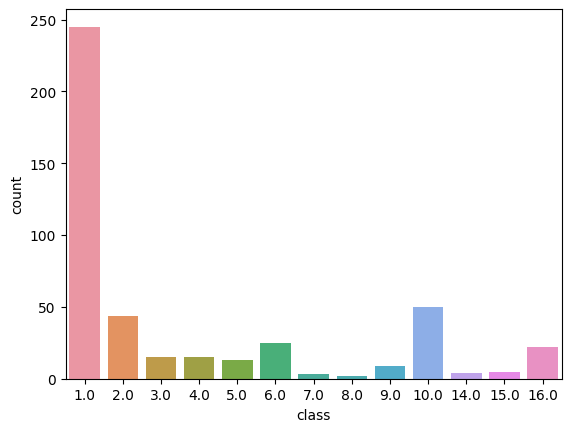

In [26]:
sns.countplot(x ='class',data =new_df) 
plt.show() 

Lets Count the total number of instances we have for each class.

In [27]:
values = la[0:10]
values.extend([0,0,0])
values.extend(la[10:13])
print(values)


[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 0, 0, 0, 4, 5, 22]


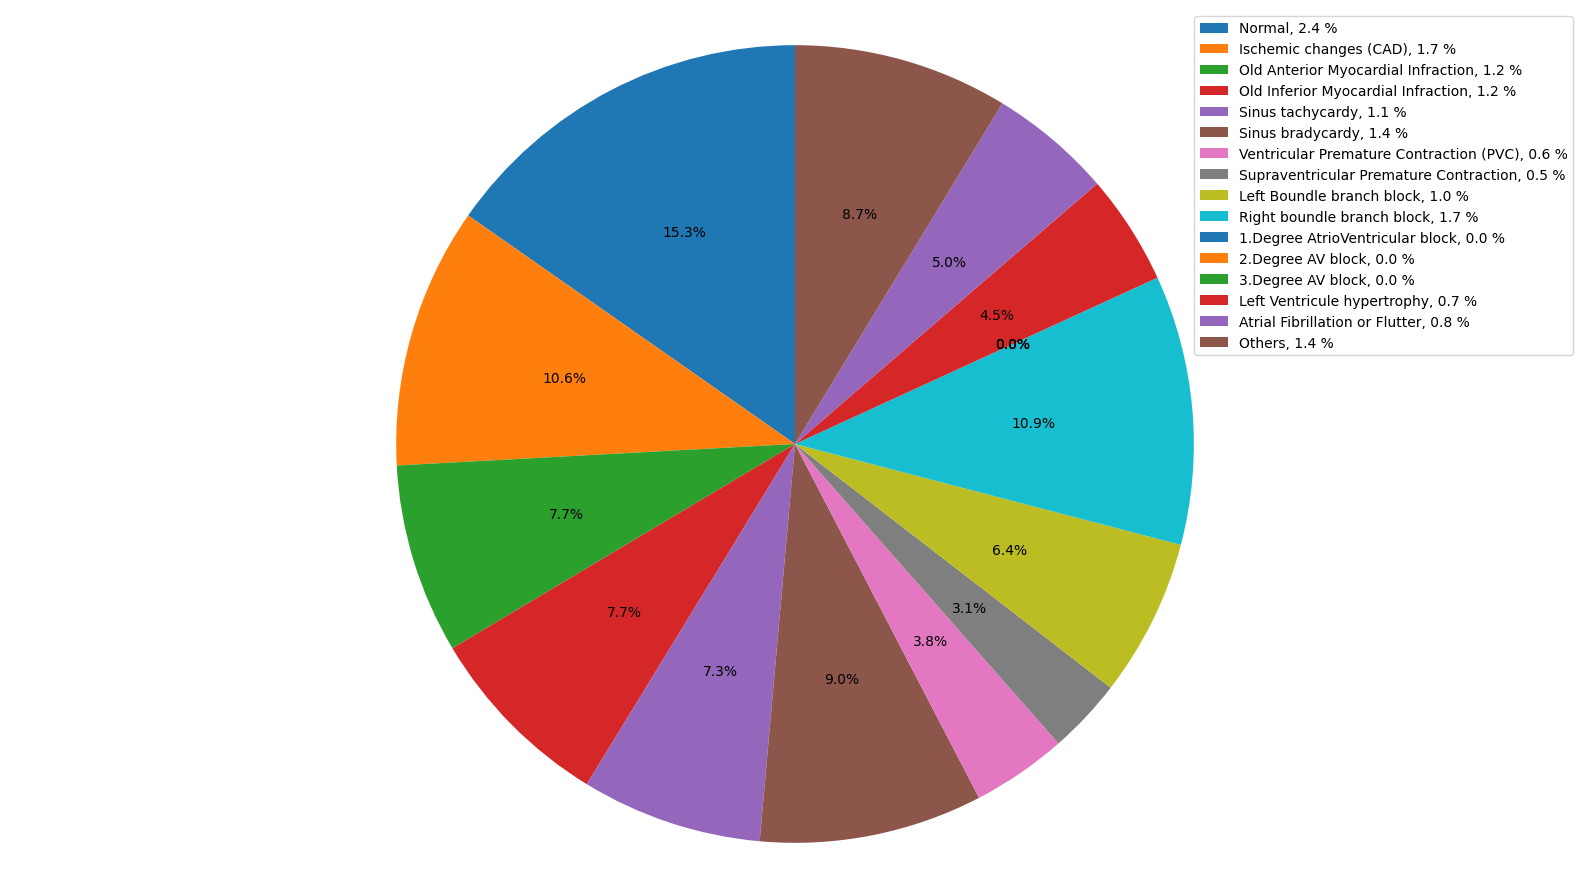

In [28]:
labels = class_names
Log_Norm = []
for i in values:
    Log_Norm.append(mt.log10(i+1))
fig1, ax1 = plt.subplots(figsize=(16,9))
patches = plt.pie(Log_Norm, autopct='%1.1f%%', startangle=90)

leg = plt.legend( loc = 'best', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, Log_Norm)])
plt.axis('equal')

for text in leg.get_texts():
    plt.setp(text, color = 'Black')
plt.tight_layout()
plt.show()


We found that Of the 452 examples, 245 are of class A which refers to "normal" people. We also have 12 different types of arrhythmias and 3 other type of arrthmias are not present in our dataset.


### Handling Outliers & Data Visualization

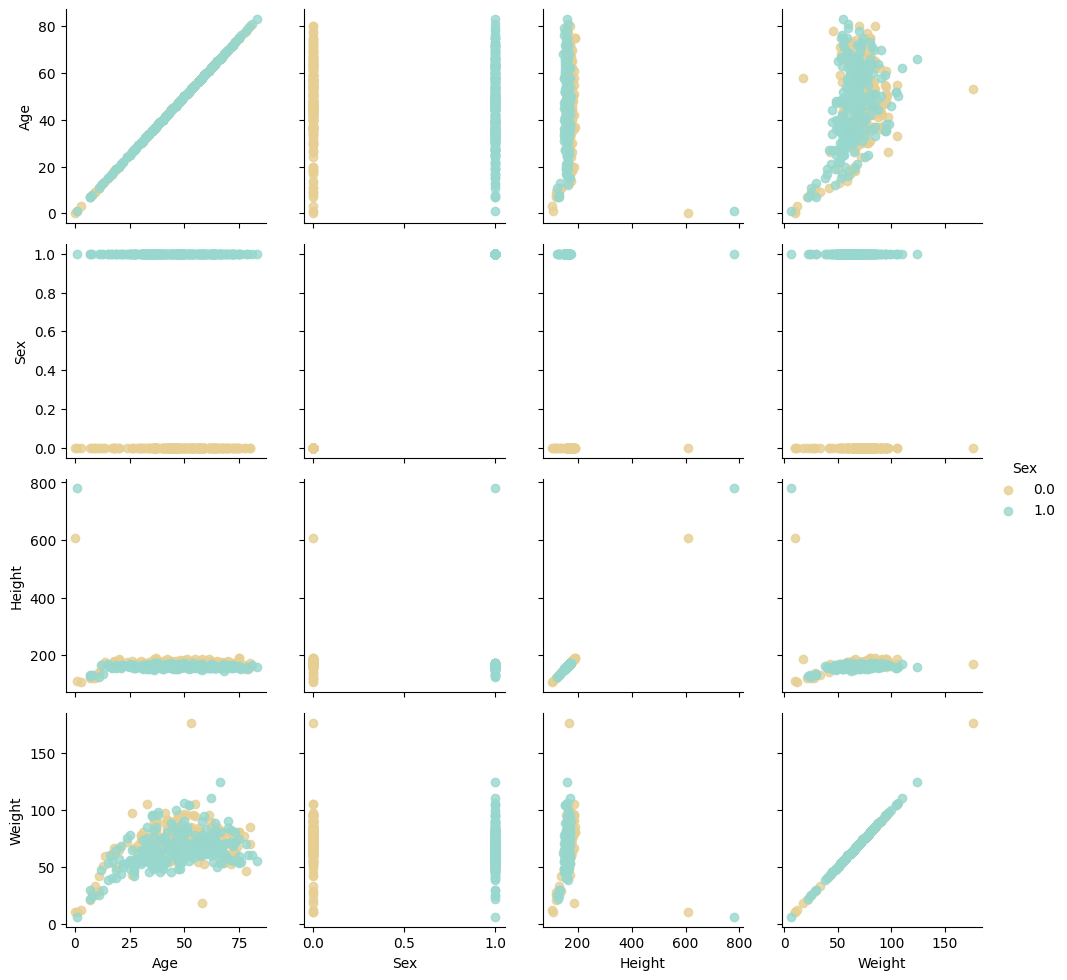

In [29]:
#looking for pairwise relationships and outliers

g = sns.PairGrid(final_df, vars=['Age', 'Sex', 'Height', 'Weight'],hue='Sex', palette='BrBG')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

According to scatter plots, there are few outliers in 'height' and 'weight' attributes.check the maximums of heights and weights

In [30]:
sorted(final_df['Height'], reverse=True)[:10]

[780.0, 608.0, 190.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0]

The tallest person ever lived in the world was **272** cm (1940). His followers were **267** cm(1905) and **263.5** cm(1969). Replacing **780** and **608** with **180** and **108** cm respectively

In [31]:
final_df['Height']=final_df['Height'].replace(608,108)
final_df['Height']=final_df['Height'].replace(780,180)

In [32]:
sorted(final_df['Weight'], reverse=True)[:10]

[176.0, 124.0, 110.0, 106.0, 105.0, 105.0, 104.0, 104.0, 100.0, 98.0]

**176 kgs** is a possible weight. so we'll keep them in the dataframe.

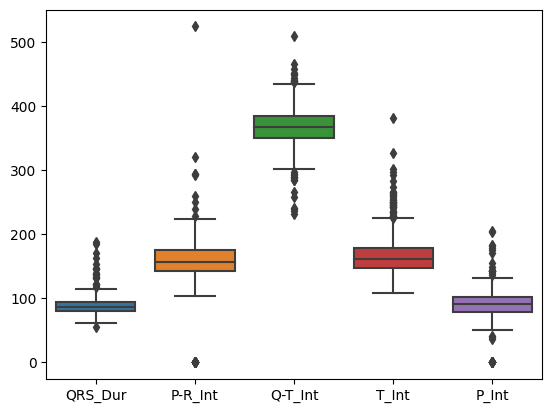

In [33]:
sns.boxplot(data=final_df[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);

PR interval is the period, measured in milliseconds, that extends from the beginning of the P wave until the beginning of the QRS complex; it is normally between 120 and 200ms in duration. 

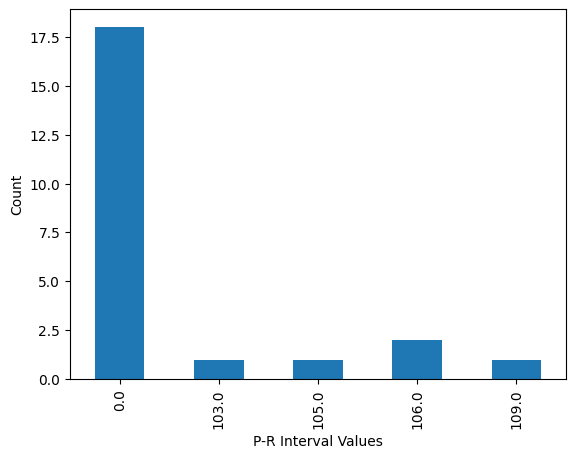

In [34]:
final_df['P-R_Int'].value_counts().sort_index().head().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

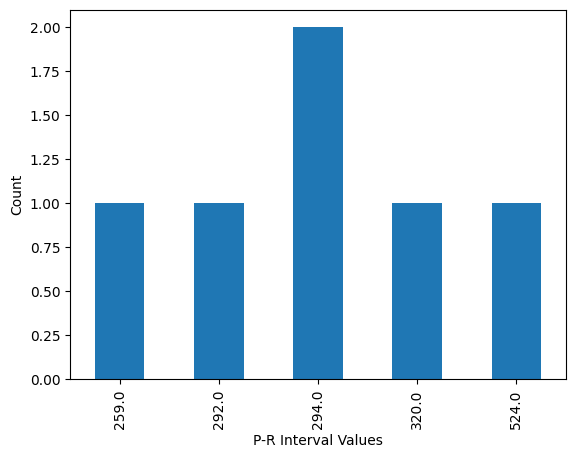

In [35]:
final_df['P-R_Int'].value_counts().sort_index().tail().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

PR Interval data is including outliers 0(x18). we'll keep them

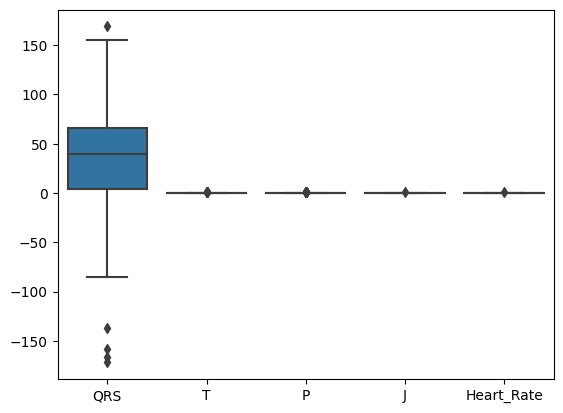

In [36]:
sns.boxplot(data=final_df[["QRS","T","P","J","Heart_Rate"]]);

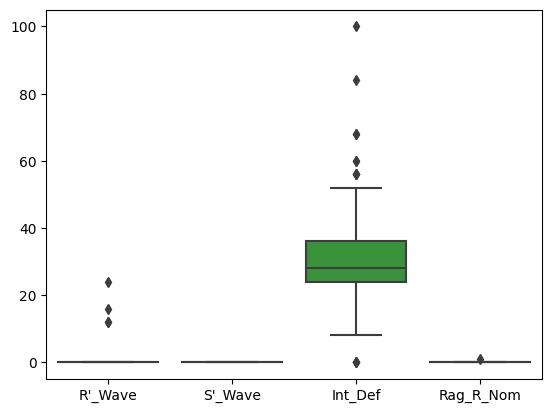

In [37]:
sns.boxplot(data=final_df[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]]);

*S*'Wave has 0's which is not a NaN. So, we can't assume it as including outliers.

In [38]:
final_df["S'_Wave"].value_counts().sort_index(ascending=False)

S'_Wave
0.0    452
Name: count, dtype: int64

In [39]:
final_df["V101"].value_counts().sort_index(ascending=False)

V101
216.0     1
112.0     1
84.0      1
72.0      1
68.0      1
64.0      1
48.0      6
44.0      6
40.0     13
36.0     36
32.0     63
28.0     81
24.0     88
20.0     57
16.0     13
12.0      4
0.0      79
Name: count, dtype: int64

**V101** has an outlier, but when we look at other sets (V201, V301, V501) we can see that there's an outlier similarly. Since our data is heavily biased, I can't say these outliers should be dropped. 

For example, when we look at our data, we can see that class # 8 (Supraventricular Premature Contraction) **has only 2 instances**. Or # 3 (Ventricular Premature Contraction (PVC)) has only 3. The outliers appearing with our plots might belong to these instances and needs to be kept.

Now we can see outlier within the last two attributes of each series(DIII188, DIII189, AVR198, AVR199, AVL208, AVL209, AVF218, AVF219, V2238, V2239, V3248, V3249,V4258, V4259,V5268, V5269, V6278, V6279). Similiarly assuming that these outliers might belong to the classes with few instances.

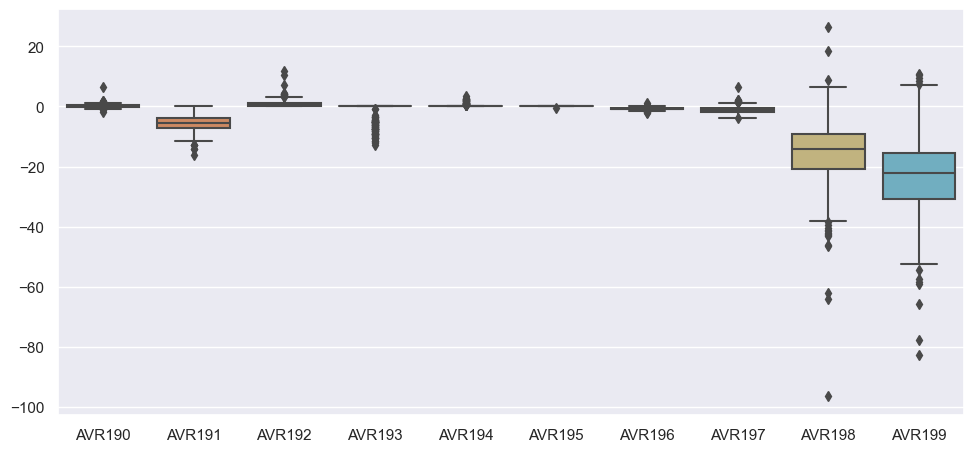

In [40]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199"]]);

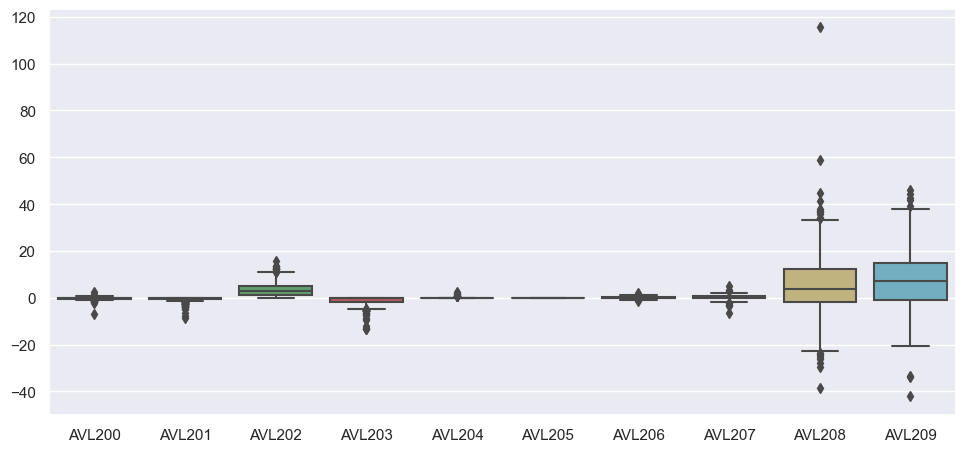

In [41]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209"]]);

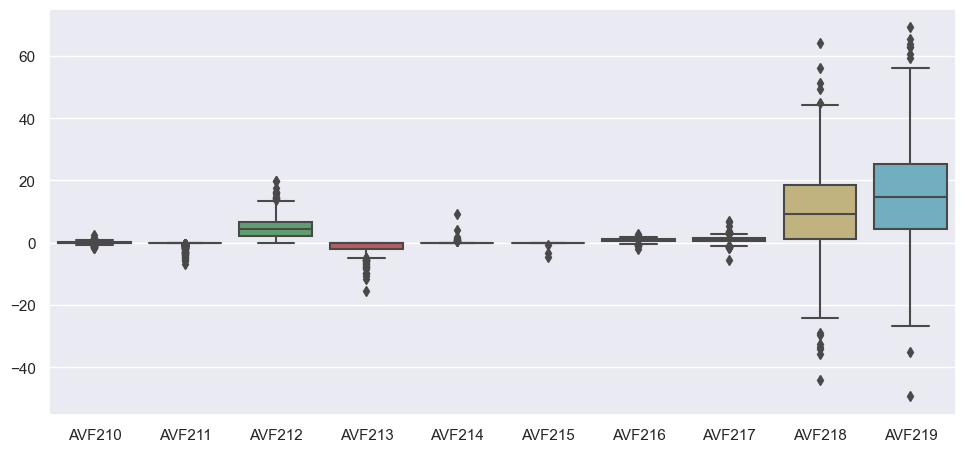

In [42]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219"]]);

In [43]:
#finding correlation with target feature using pearson correlation

target=new_df["class"]
pearsoncorr = final_df.corrwith(other = target,method='pearson')
pearsoncorr.values

array([-9.23812218e-02, -1.78080037e-01, -3.46671442e-02, -9.01507390e-02,
        3.23878728e-01, -9.99540161e-02,  2.83049762e-02,  9.76253981e-02,
       -1.22002504e-01,  1.95854526e-02, -1.68648870e-04,  1.90644217e-01,
       -3.08114850e-02,  3.33672764e-02,  3.96491896e-03,  4.26738126e-02,
        1.95198200e-01,  6.39992472e-02,             nan,  4.27635327e-02,
       -2.01150248e-02,  7.67517615e-03, -3.55694451e-02,  3.20969797e-02,
        3.20969797e-02,  8.30559434e-02, -3.61168680e-03,  4.83674292e-02,
        1.83082712e-01, -1.05049431e-02,  6.65428889e-02,  6.77662940e-02,
        4.17574601e-02,  7.98435069e-02, -2.01150248e-02,  1.69531020e-02,
       -3.60504699e-02, -6.66334979e-04, -2.36687153e-02,  1.16515578e-01,
        8.16735582e-02,  1.44307782e-02, -3.20137575e-02,  8.34076694e-02,
       -3.08114850e-02,  5.14341059e-02, -3.08114850e-02, -8.40208668e-02,
       -1.15446555e-02, -5.76271452e-03,  2.10381327e-02,  1.73243101e-01,
        2.54790200e-03,  

## Feature Scaling and Splitting dataset
<br />
We will be using 80% of our dataset for training purpose and 20% for testing purpose.

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df, target ,test_size=0.2, random_state=42)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
import warnings
warnings.filterwarnings('ignore')

## Evaluation strategy


As the dependent variable is a categorical variable we will be using classification models. The best evaluation strategy for classification models is comparing the precision and recall. Thinking about the classification evaluation metrics, the importance of our models' precitions (we can't accept a result having the probability of saying to a healthy person that you have Cardiac Arrhythmia (FN)).

We definitely will focus on Sensitivity (the percentage of sick people who are correctly identified as having the condition) not Specificity (percentage of healthy people who are correctly identified as not having the condition).

In [47]:
# importing evaluation metrices.

from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,recall_score,precision_score,confusion_matrix,classification_report
from scikitplot.metrics import plot_confusion_matrix,plot_roc

# **3. Modeling**

## KNN Classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier()
knnclassifier.fit(X_train, y_train)
y_pred = knnclassifier.predict(X_test)

In [49]:
knn_train_accuracy = accuracy_score(y_train, knnclassifier.predict(X_train))
knn_test_accuracy = accuracy_score(y_test, knnclassifier.predict(X_test))
knn_train_recall = recall_score(y_train, knnclassifier.predict(X_train),average="weighted")
knn_test_recall = recall_score(y_test, knnclassifier.predict(X_test),average="weighted")

In [50]:
print('Train Recall score: {}'
      .format(knn_train_recall))
print('Test Recall score: {}'
      .format(knn_test_recall))
confusion_matrix(y_test, y_pred)

Train Recall score: 0.6509695290858726
Test Recall score: 0.5274725274725275


array([[43,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [13,  0,  0,  0,  1,  0,  0,  0,  2,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

## Logistic regression

In [51]:
from sklearn.linear_model import LogisticRegression
lgclassifier = LogisticRegression(solver = 'saga',random_state = 0) 
lgclassifier.fit(X_train, y_train) 
y_pred = lgclassifier.predict(X_test)

In [52]:
lg_train_recall = recall_score(y_train, lgclassifier.predict(X_train),average='weighted')
lg_test_recall = recall_score(y_test, lgclassifier.predict(X_test),average='weighted')
lg_train_accuracy = accuracy_score(y_train, lgclassifier.predict(X_train))
lg_test_accuracy = accuracy_score(y_test, lgclassifier.predict(X_test))


In [53]:
print('Train Recall score: {}'
      .format(lg_train_recall))
print('Test Recall score: {}'
      .format(lg_test_recall))
confusion_matrix(y_test, y_pred)

Train Recall score: 0.9390581717451524
Test Recall score: 0.7032967032967034


array([[42,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 4,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 4,  1,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]], dtype=int64)

## Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier 
dtclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=5)
dtclassifier.fit(X_train, y_train) 
y_pred_test = dtclassifier.predict(X_test)
y_pred_train = dtclassifier.predict(X_train)

In [55]:
dt_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
dt_test_recall = recall_score(y_test, y_pred_test,average="weighted")
dt_train_accuracy = accuracy_score(y_train,y_pred_train )
dt_test_accuracy = accuracy_score(y_test, y_pred_test)


In [56]:
print('Train Recall score: {}'
      .format(dt_train_recall))
print('Test Recall score: {}'
      .format(dt_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.7977839335180056
Test Recall score: 0.6483516483516484


array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  2,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  7,  1,  0,  2],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0]], dtype=int64)

## SVM

In [57]:
from sklearn.svm import LinearSVC 
lsvclassifier = LinearSVC(C=0.01)
lsvclassifier.fit(X_train, y_train) 
y_pred_test = lsvclassifier.predict(X_test)
y_pred_train = lsvclassifier.predict(X_train)

In [58]:
lsvc_train_accuracy = accuracy_score(y_train, y_pred_train)
lsvc_test_accuracy = accuracy_score(y_test, y_pred_test)
lsvc_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
lsvc_test_recall = recall_score(y_test, y_pred_test,average="weighted")

In [59]:
print('Train Recall score: {}'
      .format(lsvc_train_recall))
print('Test Recall score: {}'
      .format(lsvc_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8836565096952909
Test Recall score: 0.6593406593406593


array([[42,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 4,  1,  0,  0,  1,  0,  0,  1,  9,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

## Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini',max_features=100,max_depth=10,max_leaf_nodes=30)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=100, max_leaf_nodes=30,
                       n_estimators=300)

In [61]:
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

rf_train_accuracy = accuracy_score(y_train, y_pred_train)
rf_test_accuracy = accuracy_score(y_test, y_pred_test)
rf_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
rf_test_recall = recall_score(y_test, y_pred_test,average="weighted")

In [62]:
print('Train Recall score: {}'
      .format(rf_train_recall))
print('Test Recall score: {}'
      .format(rf_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8975069252077562
Test Recall score: 0.6923076923076923


array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 6,  1,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0]], dtype=int64)

In [63]:
common_labels = set(np.unique(y_train)).intersection(set(np.unique(y_test)))

# Filter data based on common labels
mask_train = np.isin(y_train, list(common_labels))
mask_test = np.isin(y_test, list(common_labels))

X_train_common = X_train[mask_train]
y_train_common = y_train[mask_train]

X_test_common = X_test[mask_test]
y_test_common = y_test[mask_test]

In [64]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_common)
y_test_encoded = le.transform(y_test_common)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_common)
X_test = scaler.transform(X_test_common)

# Build the model
model1 = Sequential()
model1.add(Dense(units=452, activation='relu', input_dim=X_train.shape[1]))
model1.add(Dense(units=256, activation='relu'))
model1.add(Dense(units=128, activation='relu'))
model1.add(Dense(units=64, activation='relu'))
model1.add(Dense(units=32, activation='relu'))
model1.add(Dense(units=np.max(y_train_common) + 1, activation='softmax'))

# Compile the model

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model1.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded),validation_split=0.9)

# Evaluate the model
loss, accuracy = model1.evaluate(X_test, y_test_encoded)
print(f'Test Loss: {loss:.2f}')
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Make predictions
y_pred = model1.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Filter valid labels
valid_labels = np.intersect1d(np.unique(y_train_common), np.unique(y_test_common))

# Ensure same number of samples
min_samples = min(len(y_test_encoded), len(y_pred_classes))
y_test_encoded_filtered = y_test_encoded[:min_samples]
y_pred_classes_filtered = y_pred_classes[:min_samples]

# Convert encoded labels back to original labels
y_test_original = le.inverse_transform(y_test_encoded_filtered)
y_pred_original = le.inverse_transform(y_pred_classes_filtered)

# Print classification report
print(classification_report(y_test_original, y_pred_original))



Epoch 1/10


12/12 [==============================] - 6s 83ms/step - loss: 2.5048 - accuracy: 0.4106 - val_loss: 2.2214 - val_accuracy: 0.4835
Epoch 2/10
12/12 [==============================] - 0s 18ms/step - loss: 1.5965 - accuracy: 0.5726 - val_loss: 1.8444 - val_accuracy: 0.5385
Epoch 3/10
12/12 [==============================] - 0s 18ms/step - loss: 1.2301 - accuracy: 0.6592 - val_loss: 1.7156 - val_accuracy: 0.6154
Epoch 4/10
12/12 [==============================] - 0s 18ms/step - loss: 0.9275 - accuracy: 0.7263 - val_loss: 1.7088 - val_accuracy: 0.6154
Epoch 5/10
12/12 [==============================] - 0s 17ms/step - loss: 0.6485 - accuracy: 0.8101 - val_loss: 1.5643 - val_accuracy: 0.6593
Epoch 6/10
12/12 [==============================] - 0s 17ms/step - loss: 0.4277 - accuracy: 0.8631 - val_loss: 1.9749 - val_accuracy: 0.6154
Epoch 7/10
12/12 [==============================] - 0s 17ms/step - loss: 0.2795 - accuracy: 0.9246 - val_loss: 2.0295 - val_accuracy: 0.6593
Epoch 8/1

In [65]:
train_recall = recall_score(y_train_encoded, np.argmax(model1.predict(X_train), axis=1), average='weighted')
test_recall = recall_score(y_test_encoded, y_pred_classes, average='weighted')
train_acc = accuracy_score(y_train_encoded, np.argmax(model1.predict(X_train), axis=1))
test_acc = accuracy_score(y_test_encoded, y_pred_classes)

print(f"Train Recall score: {train_recall}")
print(f"Test Recall score: {test_recall}")

# Create a DataFrame with unique labels and zero counts for predictions
unique_labels_gt = np.unique(y_test_original)
unique_labels_pred = np.unique(y_pred_original)

# Ensure that all unique labels are present in predictions
missing_labels = set(unique_labels_gt) - set(unique_labels_pred)
for label in missing_labels:
    indices = np.where(unique_labels_pred > label)[0]
    if len(indices) > 0:
        index = indices[0]
    else:
        index = len(unique_labels_pred)
    unique_labels_pred = np.insert(unique_labels_pred, index, label)

# Check the number of unique labels in the predicted class labels
num_labels_pred = len(unique_labels_pred)

# If the number of predicted labels is less than 11, add dummy columns
if num_labels_pred < 11:
    # Create an empty array to store the dummy columns
    dummy_columns = np.zeros((y_pred_classes.shape[0], 11 - num_labels_pred))

    # Add each dummy column to the empty array
    for i in range(11 - num_labels_pred):
        dummy_columns[:, i] = 1

    # Concatenate the dummy columns to the data
    y_pred_classes = np.concatenate((y_pred_classes[:, None], dummy_columns), axis=1)
# Create a DataFrame with the predicted class labels
pred = pd.DataFrame({'Predicted_Class': y_pred_classes})

# Print the DataFrame
print("DataFrame with Predicted Class Labels:")
print(pred)

12/12 [==============================] - 0s 4ms/step
Train Recall score: 0.9972067039106145
Test Recall score: 0.6373626373626373
DataFrame with Predicted Class Labels:
    Predicted_Class
0                 0
1                 0
2                 8
3                 0
4                 0
..              ...
86                0
87                0
88                0
89                0
90                0

[91 rows x 1 columns]


In [66]:
import pandas as pd

result = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy'])

# Append a row to the DataFrame with the results of the KNN classifier
result.loc[len(result)] = ['KNN Classifier', knn_train_accuracy, knn_test_accuracy]
result.loc[len(result)] = ['Logistic Regression', lg_train_accuracy, lg_test_accuracy]
result.loc[len(result)] = ['Decision Tree Classifier', dt_train_accuracy, dt_test_accuracy]
result.loc[len(result)] = ['SVC', lsvc_train_accuracy, lsvc_test_accuracy]
result.loc[len(result)] = ['Random Forest Classifier', rf_train_accuracy, rf_test_accuracy]
result.loc[len(result)] = ["Artificial Neural Networks",train_acc,test_acc]
# Display the resulting DataFrame
print(result)

                        Model  Train Accuracy  Test Accuracy
0              KNN Classifier        0.650970       0.527473
1         Logistic Regression        0.939058       0.703297
2    Decision Tree Classifier        0.797784       0.648352
3                         SVC        0.883657       0.659341
4    Random Forest Classifier        0.897507       0.692308
5  Artificial Neural Networks        0.997207       0.637363


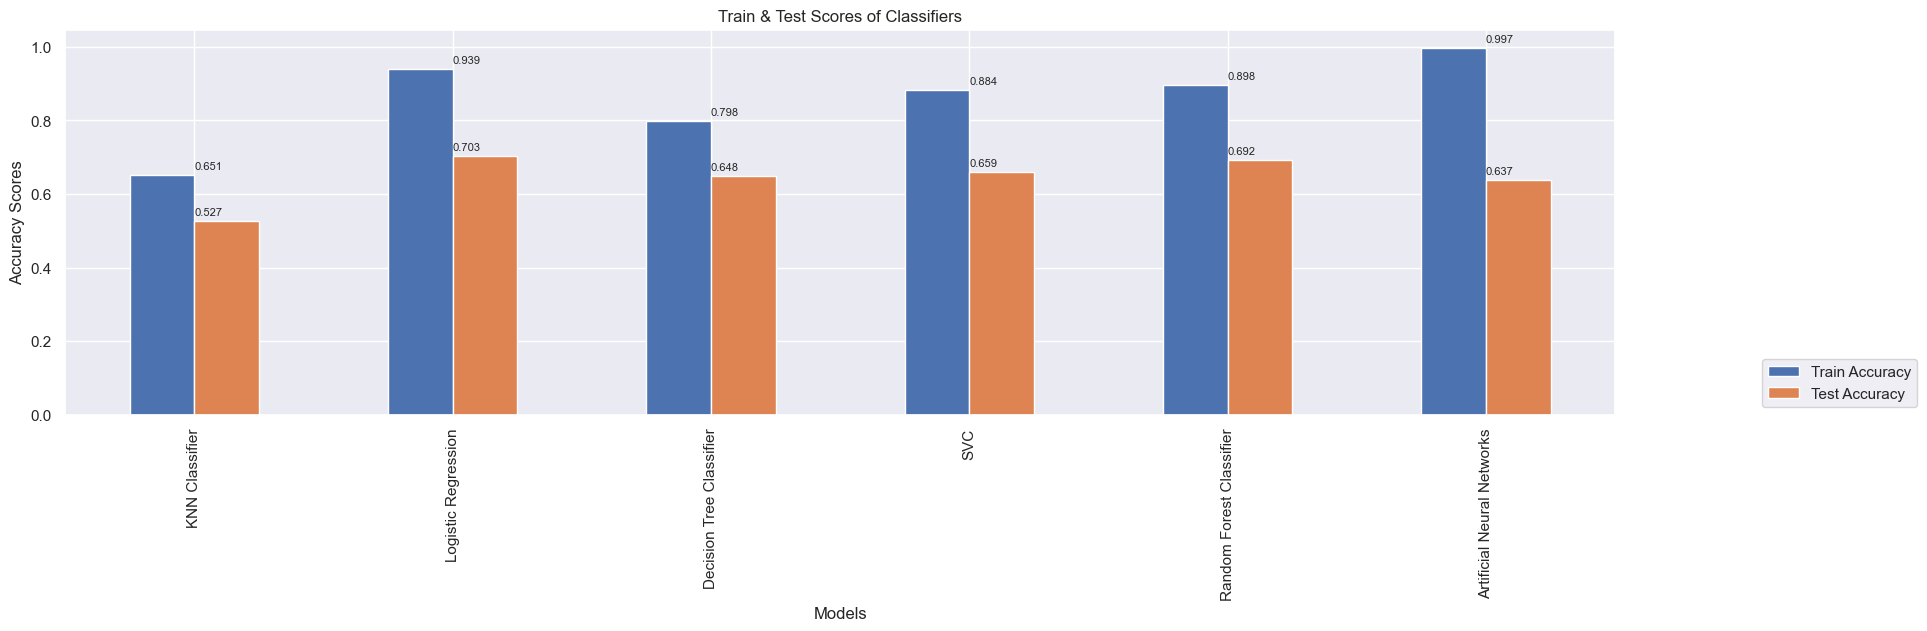

In [67]:
import matplotlib.pyplot as plt

# Reset the index and drop the old index
result.reset_index(drop=True, inplace=True)

# Convert 'Train Accuracy' and 'Test Accuracy' columns to numeric
result['Train Accuracy'] = pd.to_numeric(result['Train Accuracy'])
result['Test Accuracy'] = pd.to_numeric(result['Test Accuracy'])

# Plotting with annotations
ax = result[['Train Accuracy', 'Test Accuracy']].plot(kind="bar", figsize=(20, 5))
ax.set_xticks(range(len(result)))  # Use range(len(result)) as x-axis ticks
ax.set_xticklabels(result.Model, rotation=90)

# Add annotations on top of each bar
for i, (train_acc, test_acc) in enumerate(zip(result['Train Accuracy'], result['Test Accuracy'])):
    ax.text(i, train_acc + 0.01, f'{train_acc:.3f}', va='bottom', fontsize=8)
    ax.text(i, test_acc + 0.01, f'{test_acc:.3f}', va='bottom', fontsize=8)

plt.title('Train & Test Scores of Classifiers')
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.legend(loc=4, bbox_to_anchor=(1.2, 0))
plt.show()


Before subsetting - prob_pos shape: (91, 12) y_test_bin shape: (91, 12)
After subsetting - prob_pos shape: (91, 12) y_test_bin shape: (91, 12)
Before subsetting - prob_pos shape: (91, 12) y_test_bin shape: (91, 12)
After subsetting - prob_pos shape: (91, 12) y_test_bin shape: (91, 12)
Before subsetting - prob_pos shape: (91, 12) y_test_bin shape: (91, 12)
After subsetting - prob_pos shape: (91, 12) y_test_bin shape: (91, 12)
Before subsetting - prob_pos shape: (91, 12) y_test_bin shape: (91, 12)
After subsetting - prob_pos shape: (88, 12) y_test_bin shape: (88, 12)
Before subsetting - prob_pos shape: (91, 12) y_test_bin shape: (88, 12)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 88 but corresponding boolean dimension is 91

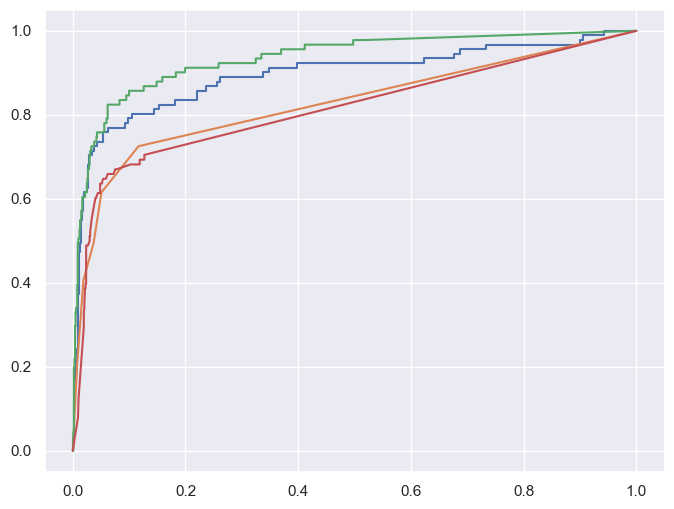

In [68]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score, auc  # Import the `auc` function

# Assuming y_test_bin is a multi-class label
y_test_bin = label_binarize(y_test_encoded, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

classifiers = [lgclassifier, knnclassifier, rf_clf, dtclassifier,lsvclassifier]
classifier_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest', 'Decision Tree','SVM']

plt.figure(figsize=(8, 6))

non_nan_mask = ~np.any(np.isnan(X_test), axis=1)
X_test = X_test[non_nan_mask]
y_test_bin = y_test_bin[non_nan_mask]

for clf, name in zip(classifiers, classifier_names):
    # Wrap the classifier in a OneVsRestClassifier and fit it
    ovr_clf = OneVsRestClassifier(clf)
    ovr_clf.fit(X_train, y_train_encoded)  # Make sure to fit on your training data
    
    if hasattr(ovr_clf, "predict_proba"):
        prob_pos = ovr_clf.predict_proba(X_test)
    else:
        prob_pos = ovr_clf.decision_function(X_test)
    
    non_nan_mask_prob_pos = ~np.isnan(prob_pos[:, 1])
    print("Before subsetting - prob_pos shape:", prob_pos.shape, "y_test_bin shape:", y_test_bin.shape)
    prob_pos = prob_pos[non_nan_mask_prob_pos, :]  # Keep all columns
    y_test_bin = y_test_bin[non_nan_mask_prob_pos]

    print("After subsetting - prob_pos shape:", prob_pos.shape, "y_test_bin shape:", y_test_bin.shape)

    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), prob_pos.ravel())
    
    # Use a different variable name for the AUC value
    auc_val = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_val:.2f})')  # Corrected line

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves (One-vs-Rest)')
plt.legend()
plt.grid(True)
plt.show()


We found that the best model in term of recall Score is Logistic Regression with accuracy percentage of **70.3** over other models. We also found that Random Forest Classifier has better accuracy score.